In [ ]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Comparison ##

In [ ]:
3 > 1

In [ ]:
type(3 > 1)

In [ ]:
3 = 3

In [ ]:
3 == 3

In [ ]:
x = 5
y = 12

In [ ]:
x == 7

In [ ]:
y - x

In [ ]:
4 < y - x

In [ ]:
y - x < 7

In [ ]:
y - x <= 7

In [ ]:
True and False

In [ ]:
True and True

In [ ]:
pets = make_array('dog', 'dog', 'cat', 'cat', 'rabbit')

In [ ]:
pets == 'dog'

In [ ]:
1 + 1 + 0 + 0 + 0

In [ ]:
sum(make_array(True, True, False, False, False))

In [ ]:
sum(pets == 'dog')

In [ ]:
np.count_nonzero(pets == 'dog')

In [ ]:
terms = Table().with_column('Semesters', np.arange(1, 9))
terms

In [ ]:
terms.where('Semesters', are.above(6))

In [ ]:
senior = are.above(6)

In [ ]:
senior(4)

In [ ]:
def also_senior(x):
    return x > 6

In [ ]:
also_senior(4)

In [ ]:
terms.apply(also_senior, 'Semesters')

## Conditional Statements ##

In [ ]:
def year_from_semesters(x):
    if  x <= 0:
        return 'Not a valid input'
    elif x <= 2:
        return 'Freshman'
    elif x <= 4:
        return 'Sophomore'
    elif x <= 6:
        return 'Junior'
    elif x <= 8:
        return 'Senior'           

In [ ]:
year_from_semesters(7)

In [ ]:
year_from_semesters(700)

In [ ]:
terms.with_column('Year', terms.apply(year_from_semesters, 'Semesters'))

## Appending Arrays ##

In [ ]:
first = np.arange(1, 6,)
second = np.arange(6, 11)

In [ ]:
first

In [ ]:
np.append(first, 300)

In [ ]:
np.append(first, second)

## Random Selection ##

In [ ]:
two_groups = ['treatment', 'control']

In [ ]:
np.random.choice(two_groups)

In [ ]:
np.random.choice(two_groups, 7)

In [ ]:
sum(np.random.choice(two_groups, 7) == 'treatment')

In [ ]:
sum(np.random.choice(two_groups, 7) == 'control')

In [ ]:
outcomes = np.random.choice(two_groups, 7)

In [ ]:
outcomes

In [ ]:
sum(outcomes == 'treatment')

In [ ]:
sum(outcomes == 'control')

In [ ]:
coin = ['heads', 'tails']

In [ ]:
np.random.choice(coin)

In [ ]:
tosses = np.random.choice(coin, 100)
tosses

In [ ]:
sum(tosses == 'heads')

In [ ]:
outcomes = make_array()

In [ ]:
outcomes

In [ ]:
np.append(outcomes, sum(np.random.choice(coin, 100) == 'heads'))

In [ ]:
outcomes

In [ ]:
outcomes = np.append(outcomes, sum(np.random.choice(coin, 100) == 'heads'))
outcomes

## Discussion Question

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


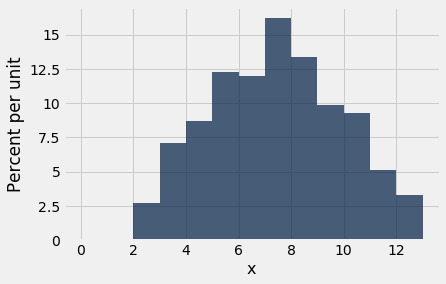

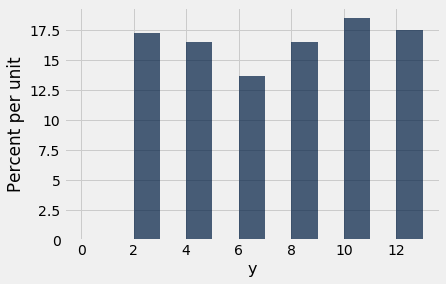

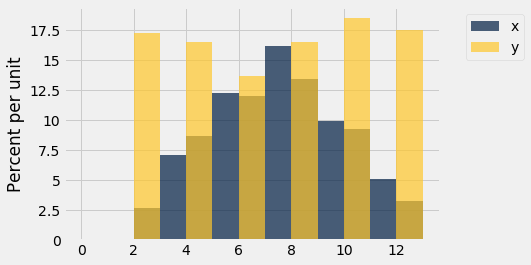

In [103]:
d = np.arange(6) + 1
samples=Table().with_columns('x',np.random.choice(d, 1000) + np.random.choice(d, 1000))
samples=samples.with_columns('y',2 * np.random.choice(d, 1000))
samples.hist("x",bins=np.arange(14))
samples.hist("y",bins=np.arange(14))
samples.hist(bins=np.arange(14))

## For Statements ##

In [ ]:
outcomes = make_array()

for i in np.arange(100000):
    outcomes = np.append(outcomes, sum(np.random.choice(coin, 100) == 'heads'))

In [ ]:
Table().with_column(
    'Heads in 100 Tosses', outcomes
).hist(bins = np.arange(25.5, 75.5))